In [1]:
import torch
 
x = torch.tensor([1,2])
y = torch.tensor([3,4])
z = x.add(y)

In [2]:
z

tensor([4, 6])

In [3]:
x

tensor([1, 2])

In [4]:
x.add_(y)

tensor([4, 6])

In [5]:
x

tensor([4, 6])

# 创建Tensor

In [6]:
#根据list数据生成tensor
torch.Tensor([1,2,3,4,5,6])

tensor([1., 2., 3., 4., 5., 6.])

In [7]:
#根据指定形状生成tensor
torch.Tensor(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [8]:
#根据给定的tensor的形状
t=torch.Tensor([[1,2,3],[4,5,6]])

In [9]:
#查看tensor的形状
t.size()

torch.Size([2, 3])

In [10]:
#shape与size()等价方式
t.shape

torch.Size([2, 3])

In [11]:
#根据已有形状创建tensor
torch.Tensor(t.size())

tensor([[3.2913e-09, 2.5811e-06, 2.6424e+20],
        [2.6708e+23, 5.1931e-11, 7.1450e+31]])

In [12]:
t.ndim

2

# torch.Tensor 与 torch.tensor 的区别

In [13]:
t1 = torch.Tensor(1)
t2 = torch.tensor(1)
print("t1的值{},t1的数据类型{}".format(t1,t1.type()))
print("t2的值{},t2的数据类型{}".format(t2,t2.type()))

t1的值tensor([0.]),t1的数据类型torch.FloatTensor
t2的值1,t2的数据类型torch.LongTensor


In [14]:
#生成一个单位矩阵
torch.eye(2,2)

tensor([[1., 0.],
        [0., 1.]])

In [15]:
#自动生成全是0的矩阵
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [16]:
#根据规则生成数据
torch.linspace(1,10,4)

tensor([ 1.,  4.,  7., 10.])

In [17]:
#生成满足均匀分布随机数
torch.rand(2,3)

tensor([[0.5118, 0.2707, 0.4509],
        [0.9465, 0.7670, 0.5807]])

In [18]:
#生成满足标准分布随机数
torch.randn(2,3)

tensor([[ 1.5981,  0.3895, -1.9307],
        [-0.2123, -0.9752, -0.1488]])

In [19]:
#返回所给数据形状相同，值全为0的张量
torch.zeros_like(torch.rand(2,3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

# 修改Tensor形状

In [20]:
#生成一个形状为2x3的矩阵
x = torch.randn(2, 3)

In [21]:
#查看矩阵的形状
x.size()   #结果为torch.Size([2, 3])

torch.Size([2, 3])

In [22]:
#查看x的维度
x.dim()    #结果为2

2

In [23]:
#把x变为3x2的矩阵
x.view(3,2)

tensor([[ 0.9137, -0.0807],
        [ 0.3545, -0.7080],
        [ 0.0662,  1.4123]])

In [27]:
#把x展平为1维向量
y=x.view(-1) 
y.shape

torch.Size([6])

In [28]:
#添加一个维度
z=torch.unsqueeze(y,0)

In [29]:
#查看z的形状
z.size()   #结果为torch.Size([1, 6])

torch.Size([1, 6])

In [31]:
z

tensor([[ 0.9137, -0.0807,  0.3545, -0.7080,  0.0662,  1.4123]])

In [30]:
#计算Z的元素个数
z.numel()   #结果为6

6

# 索引操作

In [32]:
#设置一个随机种子
torch.manual_seed(100) 

In [33]:
#生成一个形状为2x3的矩阵
x = torch.randn(2, 3)

In [35]:
x

tensor([[ 0.3607, -0.2859, -0.3938],
        [ 0.2429, -1.3833, -2.3134]])

In [34]:
#根据索引获取第1行，所有数据
x[0,:]

tensor([ 0.3607, -0.2859, -0.3938])

In [36]:
#获取最后一列数据
x[:,-1]

tensor([-0.3938, -2.3134])

In [37]:
#生成是否大于0的Byter张量
mask=x>0

In [38]:
mask

tensor([[ True, False, False],
        [ True, False, False]])

In [39]:
#获取大于0的值
torch.masked_select(x,mask)

tensor([0.3607, 0.2429])

In [40]:
#获取非0下标,即行，列索引
torch.nonzero(mask)

tensor([[0, 0],
        [1, 0]])

In [41]:
index=torch.LongTensor([[0,1,1]])
torch.gather(x,0,index)

tensor([[ 0.3607, -1.3833, -2.3134]])

In [42]:
index=torch.LongTensor([[0,1,1],[1,1,1]])
a=torch.gather(x,1,index)

In [45]:
index

tensor([[0, 1, 1],
        [1, 1, 1]])

In [43]:
a

tensor([[ 0.3607, -0.2859, -0.2859],
        [-1.3833, -1.3833, -1.3833]])

In [44]:
#把a的值返回到一个2x3的0矩阵中
z=torch.zeros(2,3)
z.scatter_(1,index,a)

tensor([[ 0.3607, -0.2859,  0.0000],
        [ 0.0000, -1.3833,  0.0000]])

# 逐元素操作

In [46]:
t = torch.randn(1, 3)
t1 = torch.randn(3, 1)
t2 = torch.randn(1, 3)

In [47]:
t

tensor([[-0.3172, -0.8660,  1.7482]])

In [48]:
t1

tensor([[-0.2759],
        [-0.9755],
        [ 0.4790]])

In [49]:
t2

tensor([[-2.3652, -0.8047,  0.6587]])

In [50]:
#t+0.1*(t1/t2)
torch.addcdiv(t, 0.1, t1, t2)

C:\Users\Li\AppData\Local\Temp\ipykernel_11632\2800451954.py:2: UserWarning: This overload of addcdiv is deprecated:
	addcdiv(Tensor input, Number value, Tensor tensor1, Tensor tensor2, *, Tensor out)
Consider using one of the following signatures instead:
	addcdiv(Tensor input, Tensor tensor1, Tensor tensor2, *, Number value, Tensor out) (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\python_arg_parser.cpp:1055.)
  torch.addcdiv(t, 0.1, t1, t2)


tensor([[-0.3055, -0.8318,  1.7063],
        [-0.2760, -0.7448,  1.6001],
        [-0.3374, -0.9256,  1.8209]])

In [51]:
#计算sigmoid
torch.sigmoid(t)

tensor([[0.4214, 0.2961, 0.8517]])

In [52]:
#将t限制在[0,1]之间
torch.clamp(t,0,1)

tensor([[0., 0., 1.]])

In [53]:
#t+2进行就地运算
t.add_(2)

tensor([[1.6828, 1.1340, 3.7482]])

# 归并操作

In [59]:
#生成一个含6个数的向量
a=torch.linspace(0,10,6)

In [60]:
a

tensor([ 0.,  2.,  4.,  6.,  8., 10.])

In [61]:
#使用view方法，把a变为2x3矩阵
a=a.view((2,3))

In [62]:
a

tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

In [63]:
#沿y轴方向累加，即dim=0
b=a.sum(dim=0)   #b的形状为[3]

In [64]:
b

tensor([ 6., 10., 14.])

In [65]:
#沿y轴方向累加，即dim=0,并保留含1的维度
b=a.sum(dim=0,keepdim=True) #b的形状为[1,3]

In [66]:
b

tensor([[ 6., 10., 14.]])

# 比较操作

In [67]:
x=torch.linspace(0,10,6).view(2,3)

In [71]:
x

tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

In [68]:
#求所有元素的最大值
torch.max(x)   #结果为10

tensor(10.)

In [69]:
#求y轴方向的最大值
torch.max(x,dim=0)  #结果为[6,8,10]

torch.return_types.max(
values=tensor([ 6.,  8., 10.]),
indices=tensor([1, 1, 1]))

In [72]:
#求最大的2个元素
torch.topk(x,1,dim=0)  #结果为[6,8,10],对应索引为tensor([[1, 1, 1]

torch.return_types.topk(
values=tensor([[ 6.,  8., 10.]]),
indices=tensor([[1, 1, 1]]))

# 矩阵操作

In [73]:
a=torch.tensor([2, 3])
b=torch.tensor([3, 4])

In [74]:
a

tensor([2, 3])

In [75]:
b

tensor([3, 4])

In [76]:
torch.dot(a,b)  #运行结果为18

tensor(18)

In [77]:
x=torch.randint(10,(2,3))
y=torch.randint(6,(3,4))

In [78]:
x

tensor([[0, 9, 5],
        [7, 3, 9]])

In [79]:
y

tensor([[2, 2, 3, 5],
        [3, 3, 3, 3],
        [1, 3, 0, 1]])

In [80]:
torch.mm(x,y)

tensor([[32, 42, 27, 32],
        [32, 50, 30, 53]])

In [81]:
x=torch.randint(10,(2,2,3))
y=torch.randint(6,(2,3,4))

In [82]:
x

tensor([[[7, 9, 2],
         [6, 7, 7]],

        [[8, 3, 6],
         [1, 5, 5]]])

In [83]:
y

tensor([[[4, 4, 3, 0],
         [0, 5, 1, 3],
         [0, 2, 0, 0]],

        [[0, 4, 3, 0],
         [5, 2, 5, 2],
         [0, 5, 3, 0]]])

In [84]:
torch.bmm(x,y)

tensor([[[28, 77, 30, 27],
         [24, 73, 25, 21]],

        [[15, 68, 57,  6],
         [25, 39, 43, 10]]])

#  Tensor与Autograd

## 标量反向传播

### 定义叶子节点及算子节点

In [85]:
import torch
 
#定义输入张量x
x=torch.Tensor([2])

In [86]:
x

tensor([2.])

In [87]:
#初始化权重参数W,偏移量b、并设置require_grad属性为True，为自动求导
w=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)

In [88]:
w

tensor([-0.2586], requires_grad=True)

In [89]:
b

tensor([0.3408], requires_grad=True)

In [90]:
#实现前向传播
y=torch.mul(w,x)  #等价于w*x
z=torch.add(y,b)  #等价于y+b

In [91]:
#查看x,w，b页子节点的requite_grad属性
print("x,w,b的require_grad属性分别为：{},{},{}".format(x.requires_grad,w.requires_grad,b.requires_grad))

x,w,b的require_grad属性分别为：False,True,True


### 查看叶子节点、非叶子节点的其他属性

In [92]:
#查看非叶子节点的requres_grad属性,
print("y，z的requires_grad属性分别为：{},{}".format(y.requires_grad,z.requires_grad))
#因与w，b有依赖关系，故y，z的requires_grad属性也是：True,True
#查看各节点是否为叶子节点
print("x，w，b，y，z的是否为叶子节点：{},{},{},{},{}".format(x.is_leaf,w.is_leaf,b.is_leaf,y.is_leaf,z.is_leaf))
#x，w，b，y，z的是否为叶子节点：True,True,True,False,False
#查看叶子节点的grad_fn属性
print("x，w，b的grad_fn属性：{},{},{}".format(x.grad_fn,w.grad_fn,b.grad_fn))
#因x，w，b为用户创建的，为通过其他张量计算得到，故x，w，b的grad_fn属性：None,None,None
#查看非叶子节点的grad_fn属性
print("y，z的是否为叶子节点：{},{}".format(y.grad_fn,z.grad_fn))
#y，z的是否为叶子节点：,

y，z的requires_grad属性分别为：True,True
x，w，b，y，z的是否为叶子节点：True,True,True,False,False
x，w，b的grad_fn属性：None,None,None
y，z的是否为叶子节点：<MulBackward0 object at 0x000001E2E0F3C6D0>,<AddBackward0 object at 0x000001E2E0C3B370>


### 自动求导，实现梯度方向传播，即梯度的反向传播

In [93]:
#基于z张量进行梯度反向传播,执行backward之后计算图会自动清空，
z.backward()
#如果需要多次使用backward，需要修改参数retain_graph为True，此时梯度是累加的
#z.backward(retain_graph=True)
 
#查看叶子节点的梯度，x是叶子节点但它无需求导，故其梯度为None
print("参数w,b的梯度分别为:{},{},{}".format(w.grad,b.grad,x.grad))
#参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None
 
#非叶子节点的梯度，执行backward之后，会自动清空
print("非叶子节点y,z的梯度分别为:{},{}".format(y.grad,z.grad))
#非叶子节点y,z的梯度分别为:None,None

参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None
非叶子节点y,z的梯度分别为:None,None


D:\ANACONDA\envs\pytorch\lib\site-packages\torch\_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:475.)
  return self._grad


## 非标量反向传播

### 定义叶子叶子节点及计算节点

In [134]:
#定义叶子节点张量x，形状为1x2
x= torch.tensor([[2, 3]], dtype=torch.float, requires_grad=True)

In [135]:
x

tensor([[2., 3.]], requires_grad=True)

In [136]:
#初始化Jacobian矩阵
J= torch.zeros(2 ,2)

In [137]:
J

tensor([[0., 0.],
        [0., 0.]])

In [138]:
#初始化目标张量，形状为1x2
y = torch.zeros(1, 2)

In [139]:
y

tensor([[0., 0.]])

In [140]:
#定义y与x之间的映射关系：
#y1=x1**2+3*x2，y2=x2**2+2*x1
y[0, 0] = x[0, 0] ** 2 + 3 * x[0 ,1]
y[0, 1] = x[0, 1] ** 2 + 2 * x[0, 0]

In [141]:
y

tensor([[13., 13.]], grad_fn=<CopySlices>)

### 调用backward获取y对x的梯度

In [142]:
#生成y1对x的梯度
y.backward(torch.Tensor([[1, 0]]),retain_graph=True)
J[0]=x.grad
#梯度是累加的，故需要对x的梯度清零
x.grad = torch.zeros_like(x.grad)

#生成y2对x的梯度
y.backward(torch.Tensor([[0, 1]]))

J[1]=x.grad
#显示jacobian矩阵的值
print(J)

tensor([[4., 3.],
        [2., 6.]])


# 使用Numpy实现机器学习

## 导入需要的库

In [2]:
import numpy as np
%matplotlib inline
 
from matplotlib import pyplot as plt

## 生成输入数据x及目标数据y

### 设置随机数种子，生成同一个份数据，以便用多种方法进行比较。

In [3]:
np.random.seed(100) 
x = np.linspace(-1, 1, 100).reshape(100,1) 
y = 3*np.power(x, 2) +2+ 0.2*np.random.rand(x.size).reshape(100,1) 

In [4]:
x

array([[-1.        ],
       [-0.97979798],
       [-0.95959596],
       [-0.93939394],
       [-0.91919192],
       [-0.8989899 ],
       [-0.87878788],
       [-0.85858586],
       [-0.83838384],
       [-0.81818182],
       [-0.7979798 ],
       [-0.77777778],
       [-0.75757576],
       [-0.73737374],
       [-0.71717172],
       [-0.6969697 ],
       [-0.67676768],
       [-0.65656566],
       [-0.63636364],
       [-0.61616162],
       [-0.5959596 ],
       [-0.57575758],
       [-0.55555556],
       [-0.53535354],
       [-0.51515152],
       [-0.49494949],
       [-0.47474747],
       [-0.45454545],
       [-0.43434343],
       [-0.41414141],
       [-0.39393939],
       [-0.37373737],
       [-0.35353535],
       [-0.33333333],
       [-0.31313131],
       [-0.29292929],
       [-0.27272727],
       [-0.25252525],
       [-0.23232323],
       [-0.21212121],
       [-0.19191919],
       [-0.17171717],
       [-0.15151515],
       [-0.13131313],
       [-0.11111111],
       [-0

In [5]:
y

array([[5.10868099],
       [4.93568612],
       [4.84737674],
       [4.81633815],
       [4.53568512],
       [4.44886234],
       [4.45095422],
       [4.37667958],
       [4.1360037 ],
       [4.12328313],
       [4.08857966],
       [3.85665524],
       [3.75882873],
       [3.65283546],
       [3.58694531],
       [3.65302503],
       [3.53638009],
       [3.32762359],
       [3.37812098],
       [3.19378016],
       [3.15184436],
       [3.18249632],
       [3.0894558 ],
       [2.92703261],
       [2.83122534],
       [2.80949142],
       [2.6772932 ],
       [2.67031998],
       [2.72509516],
       [2.51759033],
       [2.58533341],
       [2.53979978],
       [2.39599128],
       [2.40972202],
       [2.30144887],
       [2.43550502],
       [2.41932467],
       [2.20329541],
       [2.34003144],
       [2.25036653],
       [2.25899487],
       [2.21449715],
       [2.18523896],
       [2.05581724],
       [2.07904235],
       [2.13373036],
       [2.1688215 ],
       [2.057

### 查看x，y数据分布情况

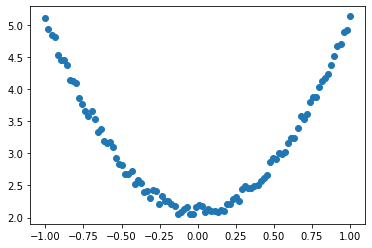

In [6]:
# 画图
plt.scatter(x, y)
plt.show()

### 初始化权重参数

In [7]:
# 随机初始化参数
w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1) 

### 训练模型

In [8]:
lr =0.001 # 学习率
 
for i in range(800):
    # 前向传播
    y_pred = np.power(x,2)*w1 + b1
    # 定义损失函数
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    #计算梯度
    grad_w=np.sum((y_pred - y)*np.power(x,2))
    grad_b=np.sum((y_pred - y))
    #使用梯度下降法，是loss最小
    w1 -= lr * grad_w
    b1 -= lr * grad_b

### 可视化结果

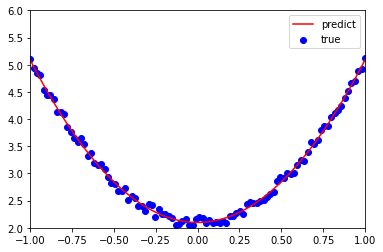

[[2.98927619]] [[2.09818307]]


In [9]:
plt.plot(x, y_pred,'r-',label='predict')
plt.scatter(x, y,color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()
print(w1,b1)

## 使用 Tensor 及 antograd 实现机器学习

### 导入需要的库

In [17]:
import torch as t

from matplotlib import pyplot as plt

### 生成训练数据，并可视化数据分布情况

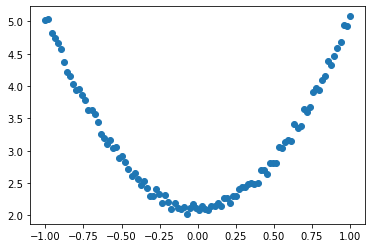

In [18]:
t.manual_seed(100) 
dtype = t.float
#生成x坐标数据，x为tenor，需要把x的形状转换为100x1
x = t.unsqueeze(t.linspace(-1, 1, 100), dim=1) 
#生成y坐标数据，y为tenor，形状为100x1，另加上一些噪音
y = 3*x.pow(2) +2+ 0.2*t.rand(x.size())                 
 
# 画图，把tensor数据转换为numpy数据
plt.scatter(x.numpy(), y.numpy())
plt.show()

### 初始化权重参数

In [19]:
# 随机初始化参数，参数w，b为需要学习的，故需requires_grad=True
w = t.randn(1,1, dtype=dtype,requires_grad=True)
b = t.zeros(1,1, dtype=dtype, requires_grad=True)

### 训练模型

In [20]:
lr =0.001 # 学习率
 
for ii in range(800):
    # 前向传播，并定义损失函数loss
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    # 自动计算梯度，梯度存放在grad属性中
    loss.backward()
    
    # 手动更新参数，需要用torch.no_grad()，使上下文环境中切断自动求导的计算
    with t.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    
    # 梯度清零
        w.grad.zero_()
        b.grad.zero_()

### 可视化训练结果

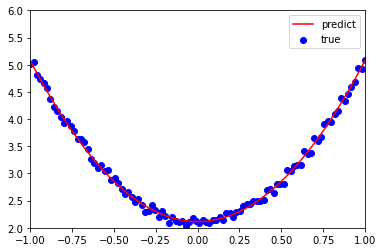

tensor([[2.9645]], requires_grad=True) tensor([[2.1146]], requires_grad=True)


In [21]:
plt.plot(x.numpy(), y_pred.detach().numpy(),'r-',label='predict')#predict
plt.scatter(x.numpy(), y.numpy(),color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()
        
print(w, b)